# E12 - Example - Demonstration of Cusp-Artifacts (3 Emitters)

This notebook is a demonstration of 'cusp-artifacts' that exist in high-order SOFI images. In this notebook, we start with a relative simpler case, 3 emitters with different on-time-ratio ($\rho$). Cusp-artifacts are intrinsic to high-order SOFI cumulants and are caused by inhomogeneous blinking profiles of emitters close to each other. For more explanation and condition exploration for cusp-artifacts, please refer to [this paper](https://www.osapublishing.org/boe/fulltext.cfm?uri=boe-11-2-554&id=425585). 

Here we show the existence of cusp-artifacts in a simulation of **three adjacent blinking emitters** with the same on-state brightness, but with on-time ratios of 0.7474, 0.4268, and 0.1134 respectively. The simulated video can be found [here](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/sampledata/simulations/3Emitters_frame5000_Emi3_close.tif). We first generated the simulation, and performed fourier interpolation on it. This is a similar example as shown in the fig. 2 of the [paper](https://www.osapublishing.org/boe/fulltext.cfm?uri=boe-11-2-554&id=425585). The simulation shows that high-order cumulants can take negative values, and if it is next to positive cumulants, cusp artifacts become visible in the SOFI-processed image. 

In this notebook, we demonstrate how to use **pysofi** to generate high-order SOFI images (auto-cumulants), and monitor the change of cumulant values for three emitters with different on-time ratio.

In [2]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from pysofi import visualization as v
from pysofi import (pysofi, filtering, masks, finterp)
import tifffile as tiff
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the Simulated Video (Tiff File) and Perform Fourier Interpolation.

First, we load the video into a PysofiData object and perform fourier interpolation on each frame to achieve higher resolution. The interpolated video will be saved into a new tiff file under the same folder as the original video. For more information on fourier interpolation, please check ['finterp.py'](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/functions/finterp.py) and <code>finterp_tiffstack</code> in ['pysofi.py'](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/functions/pysofi.py).

In [2]:
filepath = '../SampleData/simulations'
filename = '3Emitters_frame5000_Emi3_close.tif'
im = pysofi.PysofiData(filepath, filename)
fim = im.finterp_tiffstack(interp_num_lst = [8], save_option = True, return_option = True)

Calculating interpolation factor = 8...
[                             ] 0.7%

../functions/finterp.py:260: RuntimeWarning: invalid value encountered in true_divide
  interp_im = (interp_im-interp_immin)/(interp_immax-interp_immin)


[==============================] 100.0%



## Load the New Video (Tiff File).

We now load the interpolated tiff file inot a PysofiData object and do further SOFI analysis on it.

In [3]:
filepath = '../SampleData/simulations'
filename = '3Emitters_frame5000_Emi3_close_InterpNum8.tif'

im = pysofi.PysofiData(filepath, filename)

In [4]:
im.average_image()

frame 9999/10000

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

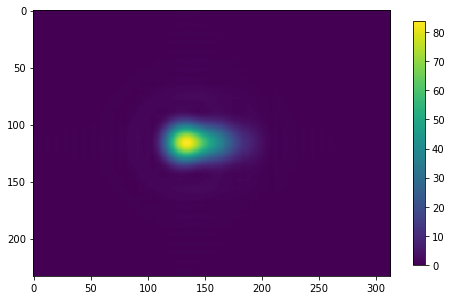

In [5]:
# Plot the mean image.
plt.figure(figsize=(8,6))
plt.imshow(im.ave)
plt.colorbar(shrink=0.75)

## Calculate auto-cumulants.

<code>im.cumulants_images</code> is a method of the PysofiData object that returns all cumulant-reconstructed images up to the highest order that the user defines. Here we set the <code>highest_order=7</code>, but the user can choose a bigger or smaller value base on the need. The <code>im.cumulants_set</code> with arrays of all sumulant orders will be generted and can be called later.

In [6]:
im.cumulants_images(highest_order=7)

frame 9999/10000Calculating the 1st-order moment...
[==============================] 100.0%

Calculating the 2nd-order moment...
[==============================] 100.0%

Calculating the 3rd-order moment...
[==============================] 100.0%

Calculating the 4th-order moment...
[==============================] 100.0%

Calculating the 5th-order moment...
[==============================] 100.0%

Calculating the 6th-order moment...
[==============================] 100.0%

Calculating the 7th-order moment...
[==============================] 100.0%



{1: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 2: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 3: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 4: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.,

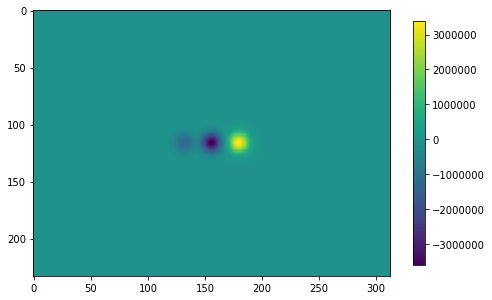

In [7]:
# Plot the 4th-order auto-cumulant SOFI image.
plt.figure(figsize=(8,6))
plt.imshow(im.cumulants_set[4])
plt.colorbar(shrink=0.75)

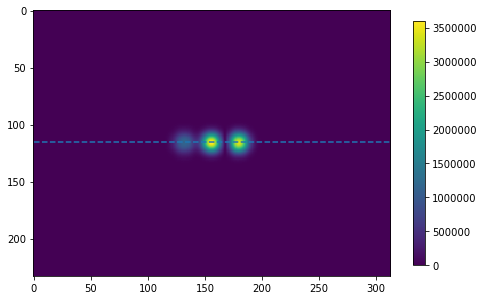

In [8]:
# Plot the absolute 4th-order auto-cumulant SOFI image, which is shown as virtual 'intensity/brightness'.
plt.figure(figsize=(8,6))
plt.imshow(abs(im.cumulants_set[4]))
plt.colorbar(shrink=0.75)
plt.plot(np.arange(313),[115]*313, '--')

## Plot the cumulant-reconstructed images and cross-sections.
This is a similar example as fig. 2 of [this paper](https://www.osapublishing.org/boe/fulltext.cfm?uri=boe-11-2-554&id=425585). We have the same simulation parameters and image orgnization as listed in the fig. 2, but slightly different on-time ratios (from left to right, 0.7474, 0.4268, and 0.1134 respectively). 

The first row are cropped SOFI images with cumulant from the second to seventh order. The second row are cross-sections at blue dashed lines of corresponding SOFI images. The third row are absolute values of cross-sections at blue dashed lines of corresponding SOFI images, which can be considered as the virtual 'brightness' of the SOFI image.

The simulations show clearly that high-order cumulants can take negative values that coexist with the positive values, leading to cusp artifacts around the zero crossing.

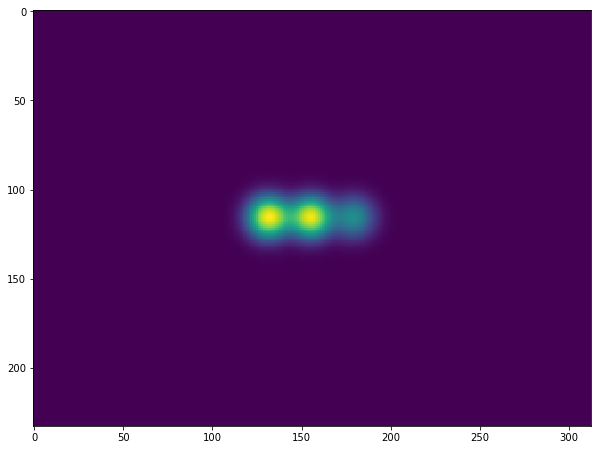

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(im.cumulants_set[2])

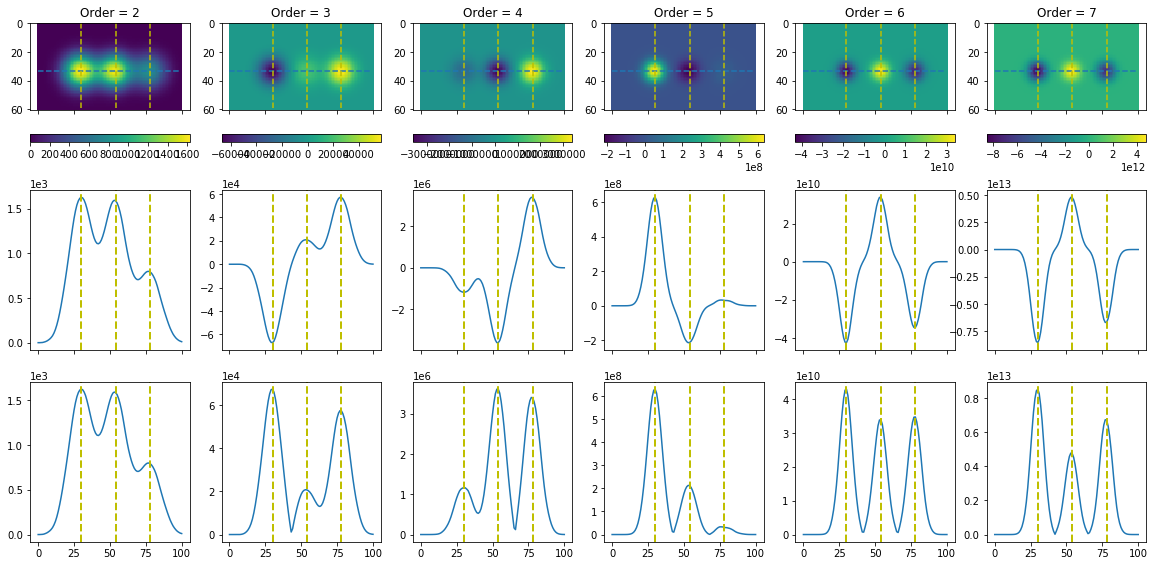

In [10]:


# import matplotlib.ticker as tick
fig, axs = plt.subplots(3,6,figsize=(20,10),sharex='col')
for i in range(2,8):
    ax = axs[0, i-2]
    img = ax.imshow(im.cumulants_set[i][82:143,102:203])
    ax.set_title(f'Order = {i}')
    ax.plot(np.arange(100),[33]*100, '--')
    ax.plot([30]*60, np.arange(60),'y--')
    ax.plot([54]*60, np.arange(60),'y--')
    ax.plot([78]*60, np.arange(60),'y--')
    plt.colorbar(img, ax=ax, orientation="horizontal")
#    ,format=tick.FormatStrFormatter('%E'))
#    cb.ax.yticklabels(["{:.1%}".format(i) for i in cb.get_ticks()])
    ax = axs[1, i-2]
    img = ax.plot(im.cumulants_set[i][115,102:203])
    #ax.plot([70]*60, np.arange(60),'r--')
    ax.axvline(x=30, linewidth=2, color='y',linestyle='--')
    ax.axvline(x=54, linewidth=2, color='y',linestyle='--')
    ax.axvline(x=78, linewidth=2, color='y',linestyle='--')
    ax.ticklabel_format(style='scientific',scilimits=(0,3))
    
    ax = axs[2, i-2]
    img = ax.plot(abs(im.cumulants_set[i][116,102:203]))
    ax.axvline(x=30, linewidth=2, color='y',linestyle='--')
    ax.axvline(x=54, linewidth=2, color='y',linestyle='--')
    ax.axvline(x=78, linewidth=2, color='y',linestyle='--')
    ax.ticklabel_format(style='scientific',scilimits=(0,3))

